In [1]:
import json
import os

def extract_vids_from_jsonl(file_path):
    vid_list = []
    
    # 파일을 열고 각 줄을 처리
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)  # json 형식으로 변환
            vid_list.append(data['vid'])  # vid 값 추출 후 리스트에 추가
    
    return vid_list

def extract_qid_vid_from_jsonl(file_path):
    qid_vid_dict = {}
    
    # 파일을 열고 각 줄을 처리
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)  # json 형식으로 변환
            qid_vid_dict[data['qid']] = data['vid']
    
    return qid_vid_dict

def get_mp4_filenames_without_extension(directory):
    filenames = []
    
    # 지정된 디렉토리에서 파일 리스트 가져오기
    for file in os.listdir(directory):
        if file.endswith(".mp4"):
            # 확장자를 제거한 파일 이름 저장
            filenames.append(os.path.splitext(file)[0])
    
    return filenames

def get_jpg_filenames_without_extension(directory):
    filenames = []
    
    # 지정된 디렉토리에서 파일 리스트 가져오기
    for file in os.listdir(directory):
        if file.endswith(".jpg"):
            # 확장자를 제거한 파일 이름 저장
            filenames.append(os.path.splitext(file)[0])
    
    return filenames

In [10]:
# 1차 caption 파일 하나로 합치기
original_path = '/home/rlaehdwls120/project/TR-DETR/data/image_caption_val.jsonl'
with open(original_path, 'r', encoding='utf-8') as f:
    data = f.readlines()
data_dir = '/home/rlaehdwls120/project/TR-DETR/data/'
train_files = ['image_caption_train_2.jsonl', 'image_caption_train_3.jsonl', 'image_caption_train_remain_0.jsonl', 'image_caption_train_remain_1.jsonl', 'image_caption_train_remain_2.jsonl', 'image_caption_train_remain_3.jsonl', 'image_caption_train_remain_4.jsonl']
test_files = ['image_caption_test_2.jsonl']
val_files = ['image_caption_val_2.jsonl']
for file in test_files:
    with open(data_dir + file, 'r', encoding='utf-8') as f:
        data += f.readlines()
print(len(data))

with open(data_dir + 'image_caption_val_total.jsonl', 'w', encoding='utf-8') as f:
    f.writelines(data)

1607


In [11]:
# highlight_all.jsonl에서 중복된 vid 목록 찾아서, qid.npy 복제
from collections import Counter

def get_duplicates(input_list):
    # 각 요소의 개수를 셈
    element_count = Counter(input_list)
    # 중복된 요소만 필터링
    duplicates = [item for item, count in element_count.items() if count > 1]
    return duplicates
all_vids = extract_vids_from_jsonl('highlight_val_release.jsonl')
print(len(all_vids))
duplicates = get_duplicates(all_vids)
print(len(duplicates))

qid_vid_dict = extract_qid_vid_from_jsonl('highlight_all.jsonl')
print(len(qid_vid_dict))

vid_qid_dict = {}
for k,v in qid_vid_dict.items():
    if v in duplicates:
        if v in vid_qid_dict:
            vid_qid_dict[v].append(k)
        else:
            vid_qid_dict[v] = [k]
print(len(vid_qid_dict))
print(vid_qid_dict)

for k,v in vid_qid_dict.items():
    for qid in v:
        if os.path.exists('qvhighlights_captions/qid{}.npz'.format(qid)):
            # 나머지 vid에 대한 qid.npz 파일 복제
            for qid2 in v:
                if qid2 != qid:
                    os.system('cp qvhighlights_captions/qid{}.npz qvhighlights_captions/qid{}.npz'.format(qid, qid2))
#caption_list = os.listdir('qvhighlights_captions')
#print(len(caption_list))

1550
31
10310
31
{'lwNho_1tKrc_60.0_210.0': [548, 1918], 'lwNho_1tKrc_210.0_360.0': [2820, 4468], 'H15bUc-1LJo_210.0_360.0': [2800, 4425], 'H15bUc-1LJo_360.0_510.0': [3622, 4738], 'H15bUc-1LJo_60.0_210.0': [6282, 8263], 'qBe1PUrRHUo_360.0_510.0': [3603, 4719], 'qBe1PUrRHUo_210.0_360.0': [3900, 5703], 'qBe1PUrRHUo_60.0_210.0': [6166, 8108], 'qBe1PUrRHUo_510.0_660.0': [6950, 9073], 'j9NNAmqweOA_60.0_210.0': [2646, 4217], 'j9NNAmqweOA_360.0_510.0': [5266, 7691], 'j9NNAmqweOA_210.0_360.0': [6107, 8028], 'g614xfyWKoE_60.0_210.0': [5043, 6675], 'g614xfyWKoE_210.0_360.0': [6139, 8065], 'T9ptpjvuIP8_210.0_360.0': [571, 1952], 'T9ptpjvuIP8_60.0_210.0': [2656, 4230], 'T9ptpjvuIP8_360.0_510.0': [6162, 8101], 'Y2GVVC_cD_E_360.0_510.0': [2429, 3325], 'Y2GVVC_cD_E_60.0_210.0': [2611, 3566], 'Y2GVVC_cD_E_210.0_360.0': [4785, 6370], 'WINZiMUH7Lk_360.0_510.0': [1389, 2214], 'WINZiMUH7Lk_60.0_210.0': [4814, 6410], 'WINZiMUH7Lk_210.0_360.0': [5246, 7654], 'EriqfBlZe5Y_60.0_210.0': [3696, 5450], 'EriqfBlZ

In [7]:
# image_caption_train.jsonl, image_caption_train_2.jsonl, not_exist_train_2.json 파일에서 vid 값 추출한 후, 전체 train video에서 아직 저장되지 않은 vid값 리스트로 추출
vid_list = []
train_caption_vid_list_1 = extract_vids_from_jsonl('image_caption_train.jsonl')
train_caption_vid_list_2 = extract_vids_from_jsonl('image_caption_train_2.jsonl')
with open('not_exist_train_2.json', 'r', encoding='utf-8') as f:
    not_exist_train_vid_list_2 = json.load(f)
print(len(train_caption_vid_list_1), train_caption_vid_list_1[:5])
print(len(train_caption_vid_list_2), train_caption_vid_list_2[:5])
print(len(not_exist_train_vid_list_2), not_exist_train_vid_list_2[:5])

vid_list.extend(train_caption_vid_list_1)
vid_list.extend(train_caption_vid_list_2)
vid_list.extend(not_exist_train_vid_list_2)

print(len(vid_list), vid_list[:5])

total_vid_list = list(set(extract_vids_from_jsonl('highlight_train_release.jsonl')))
print(len(total_vid_list), total_vid_list[:5])

remain_vid_list = list(set(total_vid_list) - set(vid_list))
print(len(remain_vid_list), remain_vid_list[:5])

# remain_vid_list를 개수가 비등하게 5개의 파일로 저장
num_files = 5
num_vids_per_file = len(remain_vid_list) // num_files
for i in range(num_files):
    start_idx = i * num_vids_per_file
    end_idx = (i + 1) * num_vids_per_file
    if i == num_files - 1:
        end_idx = len(remain_vid_list)
    with open(f'remain_vid_list_{i}.json', 'w', encoding='utf-8') as f:
        json.dump(remain_vid_list[start_idx:end_idx], f, ensure_ascii=False, indent=4)

3284 ['bs0HN9t2III_210.0_360.0', 'ZnI70bd7Gg8_60.0_210.0', 'u-61297MT1I_660.0_810.0', '1M5a5jCB9eA_360.0_510.0', 'oUF_TmkYlao_60.0_210.0']
887 ['lUv0Vdwpz48_60.0_210.0', 'MYKWNtuHrak_60.0_210.0', 'Fc7J6a1CBLc_510.0_660.0', 'AFxCO_DyzYM_360.0_510.0', '7YdNHlbtMI8_360.0_510.0']
90 ['ZnI70bd7Gg8_510.0_660.0', 'pH_zsbN5N5U_660.0_810.0', 'O_Rcn-iO2qM_60.0_210.0', '2YKJBHrCzSM_510.0_660.0', 'stbD4mQ6Nuo_360.0_510.0']
4261 ['bs0HN9t2III_210.0_360.0', 'ZnI70bd7Gg8_60.0_210.0', 'u-61297MT1I_660.0_810.0', '1M5a5jCB9eA_360.0_510.0', 'oUF_TmkYlao_60.0_210.0']
7100 ['y9Whbu4J-cs_360.0_510.0', 'sWzxXuDjXHY_360.0_510.0', 'jVp3HhflKsU_360.0_510.0', '3pBKiFO9IkE_60.0_210.0', '7DQs8XyJe-8_210.0_360.0']
2839 ['XnKUlE7OSjk_510.0_660.0', 'fpzije9PLRA_60.0_210.0', 'cd3sR686w7U_360.0_510.0', 'W1rKSyGjDmg_210.0_360.0', '_0ipsQzLdzA_510.0_660.0']


In [9]:
with open('not_exist_val_2.json', 'r', encoding='utf-8') as f:
    not_exist_test_2_json = json.load(f)
print(not_exist_test_2_json)
print(len(not_exist_test_2_json))
vid_dir = '/data/Shared_Data/qvhighlights/video_frames'
subdirectories = [d for d in os.listdir(vid_dir) if os.path.isdir(os.path.join(vid_dir, d))]
print(subdirectories)
print(len(set(not_exist_test_2_json) & set(subdirectories)))

['bTqMo5klaCE_660.0_810.0', 'J4pIK7YehhQ_60.0_210.0', '_e8_yuedv6w_660.0_810.0', 'IAbAn-MkMH8_510.0_660.0', 'ebCzdax-fjA_660.0_810.0', 'eBFyZ-JI_1s_210.0_360.0', 'LcKnx7I97yk_360.0_510.0', 'rsNuM2HcRh8_660.0_810.0', '9A_pVLuhN4Q_60.0_210.0', 'HpLaAf1xhRA_60.0_210.0', '_i9qWLsZToY_660.0_810.0', 'Z-L9RjWBTHg_360.0_510.0', 'uSAGSbauHBs_510.0_660.0', '6JnES9tDKy8_210.0_360.0', 'PXj6QOKJ_5Q_60.0_210.0', 'Y2GVVC_cD_E_360.0_510.0', 'kiSm0Nuqomg_60.0_210.0', 'rNPSRSs3reQ_60.0_210.0', 'rrTIeJRVGjg_360.0_510.0', 'mEqAtcljxHc_210.0_360.0', '_0u5I0OJP6U_210.0_360.0', 'izeyQalOwGg_210.0_360.0', 'bP5KfdFJzC4_660.0_810.0', 'KQyJtq52Jcw_660.0_810.0', '0Yf4z13YlrY_210.0_360.0', 't83PFfp4TFA_360.0_510.0', 'YpqH79OnK5M_60.0_210.0', 'dsmZngVgytA_510.0_660.0', 'Z4hMlOIhjJ4_360.0_510.0', '109g6BhejP0_360.0_510.0', 'nJUP36AmrSM_660.0_810.0', 'iuMlh75-tzs_510.0_660.0', 'iAuIX5wnNYA_210.0_360.0', 'DxIDKZHW3-E_210.0_360.0', 'DLSkojSiAPs_660.0_810.0', 'yutpAXhjMlI_60.0_210.0', 'c8j3h7fuYsY_60.0_210.0', 'PAnfDGUj

In [3]:
file_path = 'highlight_all.jsonl'
vid_list = extract_vids_from_jsonl(file_path)
print(len(vid_list))
print(vid_list)
print(len(set(vid_list)))

# .mp4 파일이 있는 디렉토리 경로
directory = '/data/Shared_Data/qvhighlights/origin_videos'

# 확장자를 뺀 파일 이름 리스트 얻기
mp4_filenames = get_mp4_filenames_without_extension(directory)
print(len(mp4_filenames))
print(mp4_filenames)

10310
['NUsG9BgSes0_210.0_360.0', 'NUsG9BgSes0_60.0_210.0', 'NUsG9BgSes0_360.0_510.0', 'NUsG9BgSes0_660.0_810.0', 'NUsG9BgSes0_510.0_660.0', 'bP5KfdFJzC4_60.0_210.0', 'bP5KfdFJzC4_210.0_360.0', 'bP5KfdFJzC4_360.0_510.0', 'bP5KfdFJzC4_660.0_810.0', 'bP5KfdFJzC4_510.0_660.0', 'nY42UppPhhg_60.0_210.0', 'nY42UppPhhg_210.0_360.0', 'nY42UppPhhg_360.0_510.0', 'RoripwjYFp8_210.0_360.0', 'RoripwjYFp8_360.0_510.0', 'RoripwjYFp8_60.0_210.0', 'r7A-cfBq2Xw_210.0_360.0', 'r7A-cfBq2Xw_360.0_510.0', 'r7A-cfBq2Xw_60.0_210.0', 'pA6Z-qYhSNg_60.0_210.0', 'pA6Z-qYhSNg_360.0_510.0', 'pA6Z-qYhSNg_210.0_360.0', 'zVwsEVwS8Kw_210.0_360.0', 'zVwsEVwS8Kw_60.0_210.0', 'zVwsEVwS8Kw_360.0_510.0', 'YIUaJzjNPuo_360.0_510.0', 'YIUaJzjNPuo_60.0_210.0', 'YIUaJzjNPuo_210.0_360.0', 'GAUdBAL0K5A_210.0_360.0', 'GAUdBAL0K5A_60.0_210.0', 'GAUdBAL0K5A_360.0_510.0', 'jv7033VUyHE_60.0_210.0', 'yId2wIocTys_60.0_210.0', 'yId2wIocTys_210.0_360.0', 'yId2wIocTys_360.0_510.0', 'A_MFAuOwK5k_360.0_510.0', 'A_MFAuOwK5k_210.0_360.0', 'A_MF

In [18]:
print(len(set(vid_list)))
print(set(vid_list))
intersection = set(vid_list) & set(mp4_filenames)
print(len(intersection))
print(intersection)

10148


TypeError: 'set' object is not subscriptable

In [15]:
import torch
def pad_sequences_2d(sequences, dtype=torch.long):
    """ Pad a double-nested list or a sequence of n-d torch tensor into a (n+1)-d tensor,
        only allow the first two dims has variable lengths
    Args:
        sequences: list(n-d tensor or list)
        dtype: torch.long for word indices / torch.float (float32) for other cases
    Returns:
    Examples:
        >>> test_data_list = [[[1, 3, 5], [3, 7, 4, 1]], [[98, 34, 11, 89, 90], [22], [34, 56]],]
        >>> pad_sequences_2d(test_data_list, dtype=torch.long)  # torch.Size([2, 3, 5])
        >>> test_data_3d = [torch.randn(2,2,4), torch.randn(4,3,4), torch.randn(1,5,4)]
        >>> pad_sequences_2d(test_data_3d, dtype=torch.float)  # torch.Size([2, 3, 5])
        >>> test_data_3d2 = [[torch.randn(2,4), ], [torch.randn(3,4), torch.randn(5,4)]]
        >>> pad_sequences_2d(test_data_3d2, dtype=torch.float)  # torch.Size([2, 3, 5])
    # TODO add support for numpy array
    """
    bsz = len(sequences)
    para_lengths = [len(seq) for seq in sequences]
    max_para_len = max(para_lengths)
    sen_lengths = [[len(word_seq) for word_seq in seq] for seq in sequences]
    max_sen_len = max([max(e) for e in sen_lengths])

    if isinstance(sequences[0], torch.Tensor):
        extra_dims = sequences[0].shape[2:]
    elif isinstance(sequences[0][0], torch.Tensor):
        extra_dims = sequences[0][0].shape[1:]
    else:
        sequences = [[torch.Tensor(word_seq, dtype=dtype) for word_seq in seq] for seq in sequences]
        extra_dims = ()

    padded_seqs = torch.zeros((bsz, max_para_len, max_sen_len) + extra_dims, dtype=dtype)
    mask = torch.zeros(bsz, max_para_len, max_sen_len).float()

    for b_i in range(bsz):
        for sen_i, sen_l in enumerate(sen_lengths[b_i]):
            padded_seqs[b_i, sen_i, :sen_l] = sequences[b_i][sen_i]
            mask[b_i, sen_i, :sen_l] = 1
    return padded_seqs, mask  # , sen_lengths

import torch

# 예시 데이터: 75개의 프레임, 각 프레임에는 최대 32개의 시퀀스, 시퀀스 길이는 가변적
src_caption_tensor = [
    [torch.randn(min(32, i + 1), 512) for i in range(75)]
]
print(src_caption_tensor)
# pad_sequences_2d 함수로 패딩과 마스크 생성
padded_seqs, mask = pad_sequences_2d(src_caption_tensor, dtype=torch.float)

print(padded_seqs[0].shape) # [512, [75, max_sentence_length
print(mask[0].shape) # [75, max_sentence_length]


[[tensor([[-5.3162e-01, -1.7106e+00, -1.5951e+00, -1.2216e+00,  9.4254e-01,
          3.2633e-01,  3.3297e-01,  2.9802e-02,  3.0153e-01,  6.9055e-01,
         -1.4319e+00, -7.7551e-01,  8.8811e-01, -9.4263e-02,  1.0479e+00,
          1.2721e+00, -6.7575e-02, -6.8683e-01,  1.0137e+00, -2.0336e-01,
         -1.6073e+00,  1.5744e+00,  3.8788e-01, -1.8227e+00, -5.5013e-01,
         -1.3877e+00,  1.1306e+00, -7.7586e-02, -8.8731e-02, -2.1086e+00,
         -3.4838e-01,  1.0485e+00,  2.6773e-02, -1.0004e+00, -1.5922e+00,
          6.3642e-01,  9.2850e-01,  2.1143e+00,  2.3702e+00,  8.0805e-02,
         -1.0067e-01,  6.9695e-01, -5.7282e-01, -9.3586e-01,  1.4086e+00,
          1.1875e-01,  7.1669e-01,  5.9179e-01, -5.1792e-01, -8.6966e-01,
          3.7259e-01, -1.9295e-01,  2.3313e-01, -7.8145e-01, -1.6953e+00,
          4.5199e-01,  4.2334e-01, -8.3830e-01,  1.1887e+00,  5.1633e-01,
          1.2623e+00,  1.8655e-01, -7.2635e-01, -1.1486e+00,  1.2923e+00,
         -2.2966e-01,  5.0504e-01, -

In [5]:
# caption 자세히 들여다보기
import json 

caption_list = []
with open('image_caption_train_8B_v2.jsonl', 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        data = json.loads(line)
        caption_list.append(data)
        #if data['vid'] == 'pA6Z-qYhSNg_360.0_510.0':
            # query :  "Man wearing sunglasses in interviewed next to a van."
            # gt : [55, 56, 57, 58, 59, 60, 61]
        for k, v in data['captions'].items():
            print(k,":", v)

0 : A man is mopping a parking lot.
1 : A snow-covered skateboarder is riding along a paved surface.
2 : A snowmobile is pulling a person across a snowy field.
A snowmobile is towing a person on snow.
3 : An aircraft is seen above a snow-covered field with mountains and a line of trees in the background.
4 : A snowy landscape with a ski slope and a mountain in the background.
5 : A power line, hill, road, trees, and a distant mountain can be seen in the image.
6 : A train is traveling on tracks through a winter landscape.
7 : A highway is bordered by trees and snow.
8 : A car is driving on a snow-covered road with trees in the background.
9 : A road with a clear sky and a mountain in the background is covered with snow.
10 : A woman is pulling a red suitcase while a man leans over a stroller in a parking lot.
11 : A man is assisting a woman with luggage at a station.
12 : A person is leaving through the entrance with a shopping cart.
13 : A person is walking away from the camera into a

In [6]:
with open('./ssl_vggss.txt', 'r') as f:
    vid_list = f.readlines()
vid_list = [vid.strip() for vid in vid_list]
vid_list = [vid.split(',') for vid in vid_list]
print(vid_list[1:6])

[['--0PQM4-hqg_000030', 'waterfall_burbling'], ['--5OkAjCI7g_000040', 'people_belly_laughing'], ['--8puiAGLhs_000030', 'car_engine_starting'], ['--96EN9NUQM_000242', 'alarm_clock_ringing'], ['--9O4XZOge4_000030', 'female_speech_woman_speaking']]


1 NUsG9BgSes0_60.0_210.0
A woman sitting in front of a desk wearing headphones and using her laptop
pred [116.0, 136.0, 0.9956]
tr [102.0, 138.0, 0.1254]
gt [118, 136]


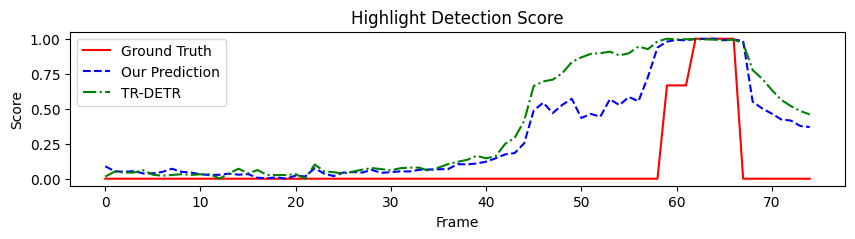

In [1]:
import json
import matplotlib.pyplot as plt

def min_max_normalize(data):
    min_val = min(data)
    max_val = max(data)
    
    # 모든 값이 동일한 경우
    if min_val == max_val:
        if min_val > 0:
            return [1.0] * len(data)  # 모든 값을 1로 설정 (0보다 큰 경우)
        else:
            return [0.0] * len(data)  # 모든 값을 0으로 설정 (0일 때)
    
    # 정규화 수행
    return [(x - min_val) / (max_val - min_val) for x in data]


pred_path = '/home/rlaehdwls120/project/TR-DETR/test-tr-detr/hl-video_tef-weighted_cap_32-2024_10_17_04_17_04/best_hl_val_preds.jsonl'
trdetr_path = '/home/rlaehdwls120/project/TR-DETR/test-tr-detr/hl-video_tef-tr-detr-2024_10_17_04_14_59/best_hl_val_preds.jsonl'
gt_path = '/home/rlaehdwls120/project/TR-DETR/data/highlight_val_release.jsonl'
with open(pred_path, 'r', encoding='utf-8') as f:
    pred_list = f.readlines()
with open(trdetr_path, 'r', encoding='utf-8') as f:
    trdetr_list = f.readlines()
with open(gt_path, 'r', encoding='utf-8') as f:
    gt_list = f.readlines()
#print(len(pred_list))

val_path = '/home/rlaehdwls120/project/TR-DETR/data/highlight_val_release.jsonl'
with open(val_path, 'r', encoding='utf-8') as f:
    val_list = f.readlines()
i = int(input("숫자를 입력하세요: "))

pred_data = json.loads(pred_list[i])
tr_data = json.loads(trdetr_list[i])
gt_data = json.loads(gt_list[i])
pred_vid = pred_data['vid']
pred_qid = pred_data['qid']
pred_mr = pred_data['pred_relevant_windows'][0]
pred_hd = pred_data['pred_saliency_scores']
tr_vid = tr_data['vid']
gt_vid = gt_data['vid']
if pred_vid != tr_vid:
    print('Different vid')
    #break
elif pred_vid != gt_vid:
    print('Different vid')
    #break
print(i, pred_vid)
tr_mr = tr_data['pred_relevant_windows'][0]
tr_hd = tr_data['pred_saliency_scores']
gt_mr = gt_data['relevant_windows'][0]
gt_hd = gt_data['saliency_scores']
gt_query = gt_data['query']
print(gt_query)
print("pred",pred_mr)
print("tr", tr_mr)
print("gt", gt_mr)
gt_hd_mean = []
for i in gt_hd:
    gt_hd_mean.append(sum(i) / len(i))
gt_hd_norm = min_max_normalize(gt_hd_mean)
gt_hd_75 = [0] * 75
for i in range(gt_mr[0]//2, gt_mr[1]//2):
    gt_hd_75[i] = gt_hd_norm[i-gt_mr[0]//2]
tr_hd_norm = min_max_normalize(tr_hd)
pred_hd_norm = min_max_normalize(pred_hd)
plt.figure(figsize=(10, 2))
plt.plot(gt_hd_75, label='Ground Truth', linestyle='-', color='red')
plt.plot(pred_hd_norm, label='Our Prediction', linestyle='--', color='blue')
plt.plot(tr_hd_norm, label='TR-DETR', linestyle='-.', color='green')
plt.title('Highlight Detection Score')
plt.xlabel('Frame')
plt.ylabel('Score')
#plt.ylim(0, 1)  # 원하는 y축 범위를 설정합니다.
plt.legend()
plt.show()

1 NUsG9BgSes0_60.0_210.0
18 r7A-cfBq2Xw_60.0_210.0
51 IdpHJK90VDw_360.0_510.0
29 GAUdBAL0K5A_60.0_210.0
84 -_s0sXOfS3w_60.0_210.0
109 DTInxNfWXVc_60.0_210.0
34 yId2wIocTys_360.0_510.0

486 -gNwItPwMhM_210.0_360.0



In [300]:
import shutil
import os

# 원본 이미지 경로와 복사할 위치 지정
vid = 'IdpHJK90VDw_360.0_510.0'
frames = [7, 10]
for frame in frames:
    src = f"/data/Shared_Data/qvhighlights/video_frames_real/{vid}/{vid}_{frame}.jpg"
    dst = f'/home/rlaehdwls120/project/TR-DETR/data/ksc2024/{vid}/{vid}_{frame}.jpg'
    if not os.path.exists(f'/home/rlaehdwls120/project/TR-DETR/data/ksc2024/{vid}'):
        os.makedirs(f'/home/rlaehdwls120/project/TR-DETR/data/ksc2024/{vid}')
    #    이미지 파일 복사
    shutil.copy(src, dst)

print(f"이미지가 {dst}에 복사되었습니다.")


이미지가 /home/rlaehdwls120/project/TR-DETR/data/ksc2024/IdpHJK90VDw_360.0_510.0/IdpHJK90VDw_360.0_510.0_10.jpg에 복사되었습니다.


In [25]:
def min_max_normalize(data):
    min_val = min(data)
    max_val = max(data)
    return [(x - min_val) / (max_val - min_val) for x in data]

print(gt_hd)
gt_hd_mean = []
for i in gt_hd:
    gt_hd_mean.append(sum(i) / len(i))
gt_hd_norm = min_max_normalize(gt_hd_mean)
# print(len(tr_hd))
# print(gt_hd_norm)
# print(len(gt_hd_norm))
# print(gt_mr)
# print(tr_mr)
print(gt_mr[0]//2)
print(gt_mr[1]//2)

    print(i-gt_mr[0]//2)
    print(i)
print(gt_hd_75)


[[1, 1, 2], [1, 1, 3], [1, 1, 3], [1, 1, 3], [1, 1, 3], [1, 1, 2], [1, 1, 3], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 2, 4], [2, 2, 3], [3, 2, 2], [4, 2, 2], [4, 2, 2], [4, 2, 2], [3, 2, 2], [3, 2, 3], [3, 2, 3], [4, 2, 3], [3, 2, 3], [3, 2, 3], [3, 2, 3], [3, 2, 3], [3, 2, 2], [3, 2, 2], [3, 2, 2], [3, 2, 3], [3, 2, 4], [3, 2, 3], [3, 2, 4], [3, 2, 4], [3, 1, 3], [3, 1, 4]]
41
75
0
41
1
42
2
43
3
44
4
45
5
46
6
47
7
48
8
49
9
50
10
51
11
52
12
53
13
54
14
55
15
56
16
57
17
58
18
59
19
60
20
61
21
62
22
63
23
64
24
65
25
66
26
67
27
68
28
69
29
70
30
71
31
72
32
73
33
74
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.20000000000000007, 0.20000000000000007, 0.20000000000000007, 0.20000000000000007, 0.0, 0.20000000000000007, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.7999999999999999, 0.6000000000000001, 0.6000000000000001, 0.7999999999999999, 0.7999999999999999, 0.7999999999999999, 0.6000

51 IdpHJK90VDw_360.0_510.0
Man in black holds a bouquet next to a purple wall.
pred [0.0, 26.0, 0.9965]
tr [0.0, 38.0, 0.9873]
gt [0, 24]


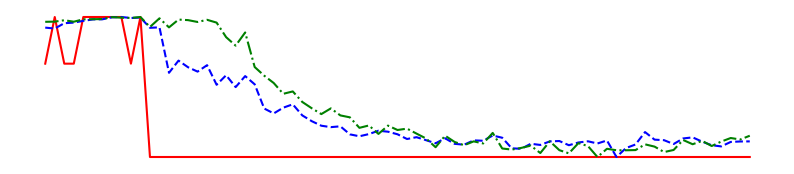

In [3]:
import json
import matplotlib.pyplot as plt

def min_max_normalize(data):
    min_val = min(data)
    max_val = max(data)
    
    # 모든 값이 동일한 경우
    if min_val == max_val:
        if min_val > 0:
            return [1.0] * len(data)  # 모든 값을 1로 설정 (0보다 큰 경우)
        else:
            return [0.0] * len(data)  # 모든 값을 0으로 설정 (0일 때)
    
    # 정규화 수행
    return [(x - min_val) / (max_val - min_val) for x in data]

pred_path = '/home/rlaehdwls120/project/TR-DETR/test-tr-detr/hl-video_tef-weighted_cap_32-2024_10_17_04_17_04/best_hl_val_preds.jsonl'
trdetr_path = '/home/rlaehdwls120/project/TR-DETR/test-tr-detr/hl-video_tef-tr-detr-2024_10_17_04_14_59/best_hl_val_preds.jsonl'
gt_path = '/home/rlaehdwls120/project/TR-DETR/data/highlight_val_release.jsonl'

with open(pred_path, 'r', encoding='utf-8') as f:
    pred_list = f.readlines()
with open(trdetr_path, 'r', encoding='utf-8') as f:
    trdetr_list = f.readlines()
with open(gt_path, 'r', encoding='utf-8') as f:
    gt_list = f.readlines()

val_path = '/home/rlaehdwls120/project/TR-DETR/data/highlight_val_release.jsonl'
with open(val_path, 'r', encoding='utf-8') as f:
    val_list = f.readlines()

i = int(input("숫자를 입력하세요: "))

pred_data = json.loads(pred_list[i])
tr_data = json.loads(trdetr_list[i])
gt_data = json.loads(gt_list[i])
pred_vid = pred_data['vid']
pred_qid = pred_data['qid']
pred_mr = pred_data['pred_relevant_windows'][0]
pred_hd = pred_data['pred_saliency_scores']
tr_vid = tr_data['vid']
gt_vid = gt_data['vid']

if pred_vid != tr_vid or pred_vid != gt_vid:
    print('Different vid')
else:
    print(i, pred_vid)

tr_mr = tr_data['pred_relevant_windows'][0]
tr_hd = tr_data['pred_saliency_scores']
gt_mr = gt_data['relevant_windows'][0]
gt_hd = gt_data['saliency_scores']
gt_query = gt_data['query']

print(gt_query)
print("pred", pred_mr)
print("tr", tr_mr)
print("gt", gt_mr)

gt_hd_mean = [sum(i) / len(i) for i in gt_hd]
gt_hd_norm = min_max_normalize(gt_hd_mean)

gt_hd_75 = [0] * 75
for i in range(gt_mr[0] // 2, gt_mr[1] // 2):
    gt_hd_75[i] = gt_hd_norm[i - gt_mr[0] // 2]

tr_hd_norm = min_max_normalize(tr_hd)
pred_hd_norm = min_max_normalize(pred_hd)

plt.figure(figsize=(10, 2))
plt.plot(gt_hd_75, label='Ground Truth', linestyle='-', color='red')
plt.plot(pred_hd_norm, label='Our Prediction', linestyle='--', color='blue')
plt.plot(tr_hd_norm, label='TR-DETR', linestyle='-.', color='green')

# 축과 라벨 제거
plt.axis('off')

plt.show()
